In [14]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Restore the dataframe from the analysis phase
features = pd.read_pickle("features.pkl")
labels = pd.read_pickle("labels.pkl")

In [16]:
# split data in training/test
X_train, X_test, y_train, y_test = train_test_split(features, labels,random_state=50, test_size=0.20)

In [17]:
# Test a bunch of models. If NL is false, Neural Networks are not tested (they are pretty slow)
def lets_try():
    results={}
    def test_model(clf):
        clf.fit(X_train,y_train)
        
        cv = KFold(n_splits=5)
        kfold_accu = cross_val_score(clf, X_train, y_train, cv=cv)
        scores=[kfold_accu.mean()]
        return scores

    # Simple Decision Tree
    clf = tree.DecisionTreeClassifier()
    results["Decision Tree"]=test_model(clf)
    # Logistic Regression
    clf = LogisticRegression()
    results["Logistic Regression"]=test_model(clf)
    # SVM Linear
    clf = svm.LinearSVC()
    results["Linear SVM"]=test_model(clf)
    # SVM RBF
    clf = svm.SVC()
    results["RBF SVM"]=test_model(clf)
    # Random Forest
    clf=RandomForestClassifier()
    results["Random Forest"]=test_model(clf)
    # AdaBoost with Decision Trees
    clf=AdaBoostClassifier()
    results["AdaBoost"]=test_model(clf)
    # Bagging
    clf=BaggingClassifier()
    results["Bagging"]=test_model(clf)
    # Ridge
    clf=RidgeClassifier()
    results["Ridge"]=test_model(clf)
    # 
    clf=KNeighborsClassifier()
    results["KNeighbors"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Accuracy"] 
    results=results.sort(columns=["Accuracy"],ascending=False)
    results.plot(kind="bar",title="Model Scores",figsize=(14,7))
    axes = plt.gca()
    axes.set_ylim([0,0.7])
    print(results)
    return plt

                     Accuracy
Bagging              0.649488
RBF SVM              0.642332
Random Forest        0.642052
Logistic Regression  0.632512
Linear SVM           0.631857
Ridge                0.629846
AdaBoost             0.628911
KNeighbors           0.610579
Decision Tree        0.585559


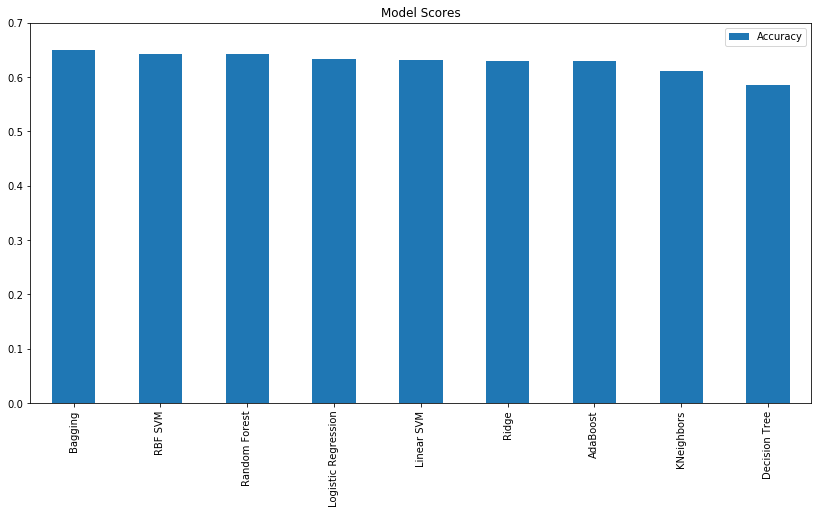

In [18]:
lets_try().show()

In [19]:
cv = KFold(n_splits=5)

parameters = {'n_estimators': [50,100,150,200,250,300]}

clf = BaggingClassifier()
grid_obj = GridSearchCV(clf, parameters, cv=cv)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_ 

In [20]:
best_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [21]:
best_clf.score(X_test,y_test)

0.67545828656939766

In [22]:
# Test model robustness
# Using different random splits
num_iters = 10
scores = []
for i in range(num_iters):
    X_train, X_test, y_train, y_test = train_test_split(features, labels,random_state=i, test_size=0.20)
    best_clf.fit(X_train,y_train)
    scores.append(best_clf.score(X_test,y_test))

In [23]:
print(scores)

[0.67227833894500566, 0.68032173587729139, 0.67471006359895247, 0.67377478488589604, 0.67377478488589604, 0.66236438458660685, 0.68088290310512534, 0.6795735129068462, 0.6835016835016835, 0.67321361765806209]
